In [17]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import time

DOT_COLOR = 'deeppink'
PREDICTED_COLOR = 'black'

In [18]:
# Generate synthetic data

NOISE = 0.5
START = 0
END = 10

np.random.seed(int(time.time()))
X = np.sort(END * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + NOISE * (0.5 - np.random.rand(80))

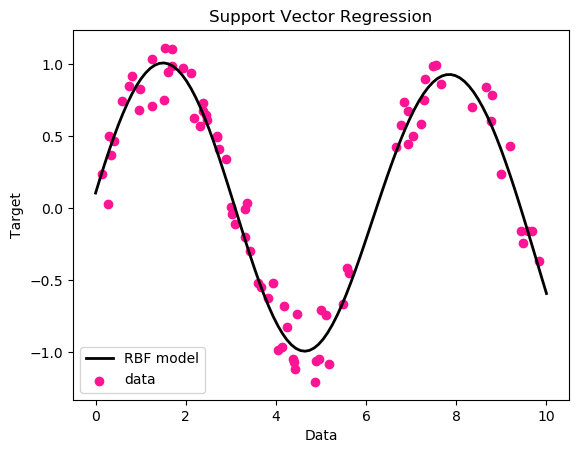

In [19]:
# Fit the SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X, y)

# Predict on new data points
X_test = np.linspace(START, END, 100)[:, np.newaxis]
y_pred = svr_rbf.predict(X_test)

# Plot the results
plt.scatter(X, y, color=DOT_COLOR, label='data')
plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='RBF model')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Fitting SVR with kernel linear
Fitting took 0.05245542526245117 seconds
Fitting SVR with kernel poly
Fitting took 0.35236454010009766 seconds
Fitting SVR with kernel rbf
Fitting took 0.004308223724365234 seconds
Fitting SVR with kernel sigmoid
Fitting took 0.0033698081970214844 seconds


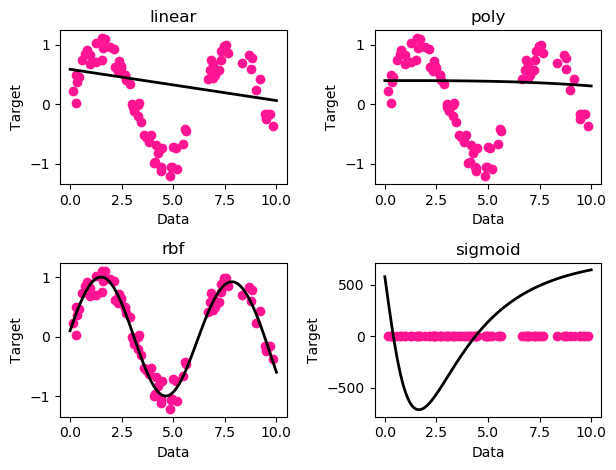

In [20]:
# Testing different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig = plt.figure(figsize=(15, 10))
for kernel in kernels:
    print(f'Fitting SVR with kernel {kernel}')
    start = time.time()
    svr = SVR(kernel=kernel, C=100, gamma=0.1)
    svr.fit(X, y)
    print(f'Fitting took {time.time() - start} seconds')
    y_pred = svr.predict(X_test)
    plt.subplot(2, 2, kernels.index(kernel) + 1)
    plt.scatter(X, y, color=DOT_COLOR, label='data')
    plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='model')
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title(kernel)
    
plt.tight_layout()
plt.show()

Fitting SVR with C=0.1
Fitting took 0.0031270980834960938 seconds
Fitting SVR with C=1
Fitting took 0.002593517303466797 seconds
Fitting SVR with C=50
Fitting took 0.00637507438659668 seconds
Fitting SVR with C=100
Fitting took 0.004633665084838867 seconds
Fitting SVR with C=500
Fitting took 0.011189460754394531 seconds
Fitting SVR with C=1000
Fitting took 0.02186727523803711 seconds


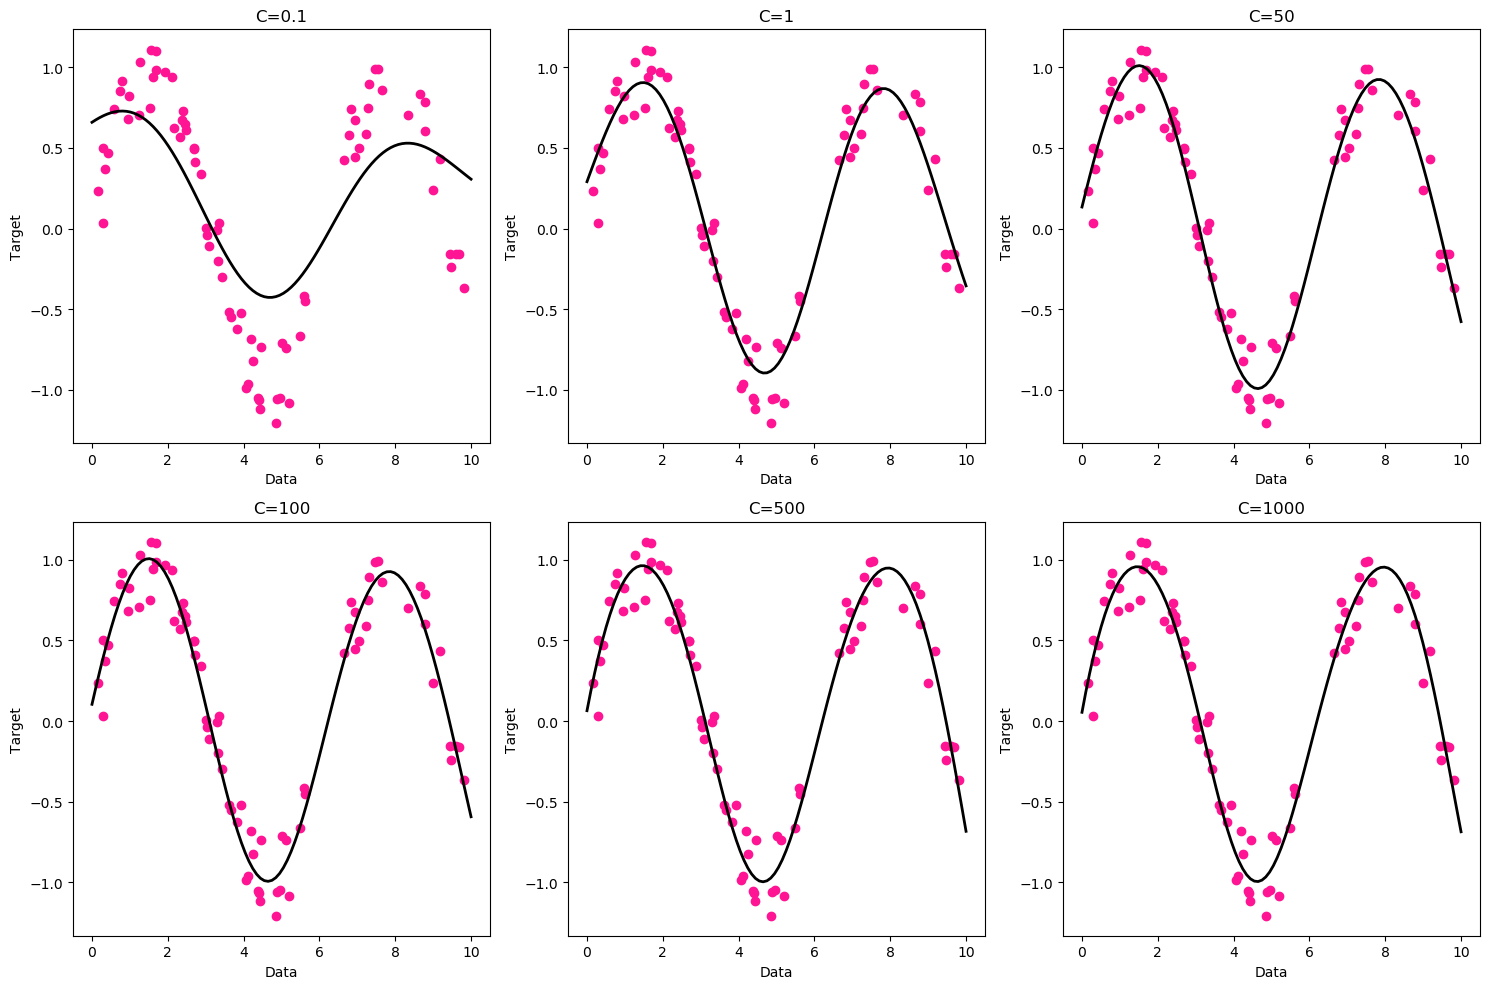

In [22]:
# Testing different C regularization parameters

C_values = [0.1, 1, 50, 100, 500, 1000]

fig = plt.figure(figsize=(15, 10))
for C in C_values:
    print(f'Fitting SVR with C={C}')
    start = time.time()
    svr = SVR(kernel='rbf', C=C, gamma=0.1)
    svr.fit(X, y)
    print(f'Fitting took {time.time() - start} seconds')
    y_pred = svr.predict(X_test)
    plt.subplot(2, 3, C_values.index(C) + 1)
    plt.scatter(X, y, color=DOT_COLOR, label='data')
    plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='model')
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title(f'C={C}')

plt.tight_layout()
plt.show()

Fitting SVR with gamma=0.001
Fitting took 0.004628419876098633 seconds
Fitting SVR with gamma=0.01
Fitting took 0.0068359375 seconds
Fitting SVR with gamma=0.1
Fitting took 0.004668235778808594 seconds
Fitting SVR with gamma=1
Fitting took 0.012311220169067383 seconds
Fitting SVR with gamma=10
Fitting took 0.008507728576660156 seconds
Fitting SVR with gamma=100
Fitting took 0.004487276077270508 seconds


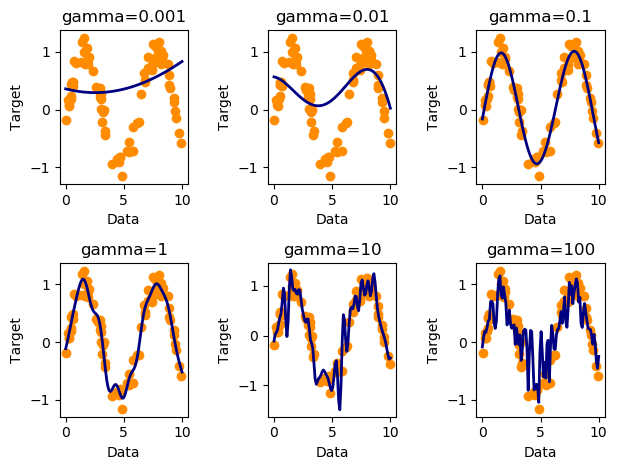

In [10]:
# Testing gammas, the kernel coefficient
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

fig = plt.figure(figsize=(15, 10))
for gamma in gamma_values:
    print(f'Fitting SVR with gamma={gamma}')
    start = time.time()
    svr = SVR(kernel='rbf', C=100, gamma=gamma)
    svr.fit(X, y)
    print(f'Fitting took {time.time() - start} seconds')
    y_pred = svr.predict(X_test)
    plt.subplot(2, 3, gamma_values.index(gamma) + 1)
    plt.scatter(X, y, color=DOT_COLOR, label='data')
    plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='model')
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title(f'gamma={gamma}')

plt.tight_layout()
plt.show()